## Workshop 2
**Name:** Piritharaman
**RegNo:** 212223230148

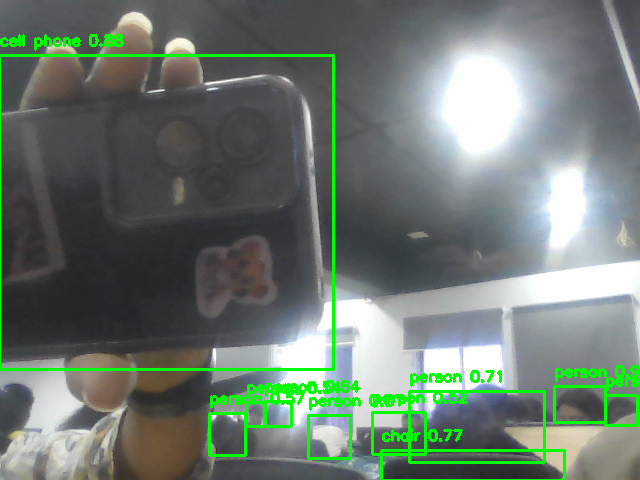

In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

# Load YOLOv4
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            continue
        
        height, width, _ = frame.shape

        blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        outputs = net.forward(output_layers)

        boxes, confidences, class_ids = [], [], []

        for output in outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        if len(indexes) > 0:
            for i in indexes.flatten():
                x, y, w, h = boxes[i]
                label = classes[class_ids[i]]
                confidence = confidences[i]
                color = (0, 255, 0)
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
                cv2.putText(frame, f"{label} {confidence:.2f}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Display in notebook
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(frame_rgb))
        clear_output(wait=True)

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    cap.release()
    print("Webcam released.")


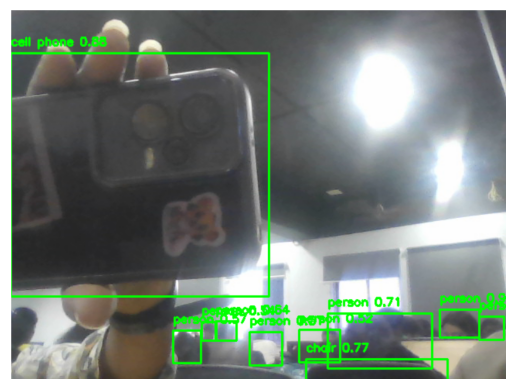

In [1]:
import matplotlib.pyplot as plt
import cv2

# Read the image from file
image = cv2.imread("snap.png")  # Replace with your file name

# Convert BGR (OpenCV default) to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()
